In [1]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras import datasets, layers,models
from keras.utils import to_categorical

In [2]:
# Load data
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

#Normalize pixel values b/w 0 and 1
train_images, test_images = train_images/255.0 , test_images/255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

CNN

In [4]:
#creatiing a convolution base

model = models.Sequential()   # used to maintain the sequence of layers
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation= 'relu',))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation= 'relu',))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Flatten the output layer

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
# Compile the model
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1472 - accuracy: 0.9548 - val_loss: 0.0467 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0344 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0400 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0409 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0334 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9747


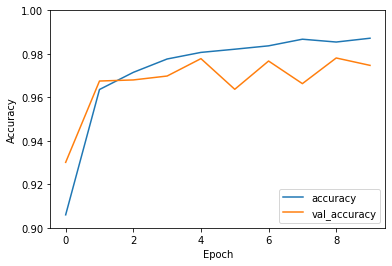

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc = 'lower right')

test_loss , test_acc = model.evaluate(test_images,test_labels)

FEED FORWARD

In [16]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (28,28,1)))
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [17]:
# Compile the model
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3433 - accuracy: 0.9060 - val_loss: 0.2999 - val_accuracy: 0.9301
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1588 - accuracy: 0.9636 - val_loss: 0.1449 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1249 - accuracy: 0.9715 - val_loss: 0.1382 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0973 - accuracy: 0.9776 - val_loss: 0.1435 - val_accuracy: 0.9698
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0857 - accuracy: 0.9807 - val_loss: 0.1054 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0752 - accuracy: 0.9821 - val_loss: 0.1380 - val_accuracy: 0.9637
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0716 - accuracy: 0.9837 - val_loss: 0.1094 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9747


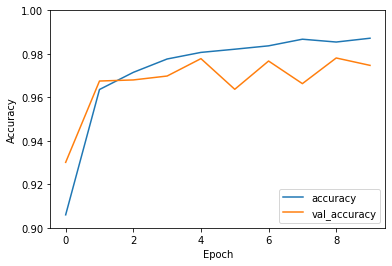

In [20]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc = 'lower right')

test_loss , test_acc = model.evaluate(test_images,test_labels)